In [1]:
"""
As a microbiologist teaching myself to code, this is 
my first independent data analysis project. I know it is a simple
linear regression model and has limitations of which I have documented 
below. I am sharing this not as a finished product but as evidence of
my learning journey and dedication to improvement.
"""

'\nAs a microbiologist teaching myself to code, this is \nmy first independent data analysis project. I know it is a simple\nlinear regression model and has limitations of which I have documented \nbelow. I am sharing this not as a finished product but as evidence of\nmy learning journey and dedication to improvement.\n'

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
import matplotlib.pyplot as plt

In [6]:
from scipy import stats

In [7]:
malaria_data = pd.read_csv('incidence-of-malaria.csv')

In [8]:
#View the top of malaria_data dataframe
malaria_data.head()

,Entity,Code,Year,"Incidence of malaria (per 1,000 population at risk)"
0,Afghanistan,AFG,2000,84.48
1,Afghanistan,AFG,2001,83.83
2,Afghanistan,AFG,2002,83.79
3,Afghanistan,AFG,2003,70.81
4,Afghanistan,AFG,2004,39.41


In [9]:
'''
slicing by rows works in getting the data for Nigeria. This may
not work well for large data that has not been ordered.
'''
#Nigeria_data = malaria_data.loc[1827:1849]

'\nslicing by rows works in getting the data for Nigeria. This may\nnot work well for large data that has not been ordered.\n'

In [10]:
Nigeria = malaria_data[malaria_data['Entity']== 'Nigeria'].copy()

In [11]:
print(Nigeria)

       Entity Code  Year  Incidence of malaria (per 1,000 population at risk)
1825  Nigeria  NGA  2000                                             401.79  
1826  Nigeria  NGA  2001                                             394.49  
1827  Nigeria  NGA  2002                                             381.75  
1828  Nigeria  NGA  2003                                             382.09  
1829  Nigeria  NGA  2004                                             390.12  
1830  Nigeria  NGA  2005                                             395.90  
1831  Nigeria  NGA  2006                                             398.57  
1832  Nigeria  NGA  2007                                             400.61  
1833  Nigeria  NGA  2008                                             402.01  
1834  Nigeria  NGA  2009                                             389.96  
1835  Nigeria  NGA  2010                                             363.36  
1836  Nigeria  NGA  2011                                        

<Axes: xlabel='Year'>

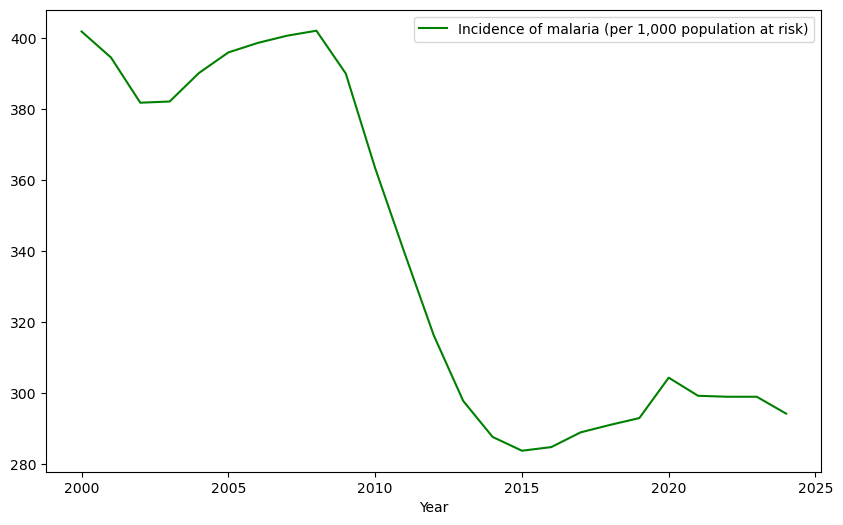

In [12]:
Nigeria.plot.line(x='Year', y='Incidence of malaria (per 1,000 population at risk)', figsize=(10, 6), color='green')

<Axes: xlabel='Year', ylabel='Incidence of malaria (per 1,000 population at risk)'>

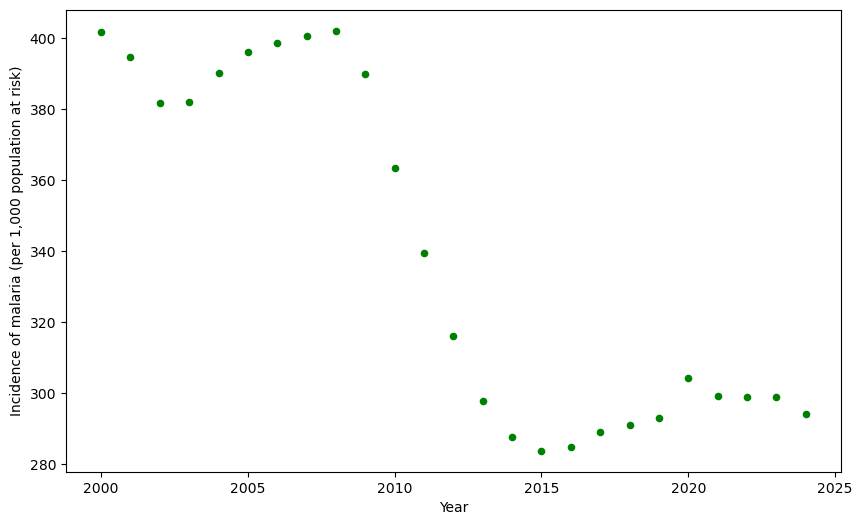

In [13]:
Nigeria.plot.scatter(x='Year', y='Incidence of malaria (per 1,000 population at risk)', figsize=(10, 6), color='green')

In [14]:
#Making a prediction for 2030

In [15]:
Year = Nigeria.Year

In [16]:
incidences = Nigeria['Incidence of malaria (per 1,000 population at risk)']

In [17]:
#finding slope, intercept, r_value, p_value, standard error
slope1, intercept1, r_value, p_value, std_err = stats.linregress(Nigeria['Year'], Nigeria['Incidence of malaria (per 1,000 population at risk)'])

In [19]:
print(f" Slope: {slope1:.6f}, Intercept: {intercept1:.6f}, r:{r_value:.1f}")

 Slope: -5.771823, Intercept: 11952.087631, r:-0.9


In [20]:
'''
y = mx + b
where y = incidence we are predicting 
m= slope
x = year(2030 in this case)
b = intercept
'''

'\ny = mx + b\nwhere y = incidence we are predicting \nm= slope\nx = year(2030 in this case)\nb = intercept\n'

In [21]:
year_2030 = 2030
predicted_2030 = slope1 * year_2030 + intercept1

print(f"\nPredicted incidence for 2030: {predicted_2030:.2f}")




Predicted incidence for 2030: 235.29


In [22]:
# Create a simple trend line for all years
Nigeria['trend'] = slope1 * Nigeria['Year'] + intercept1

In [23]:
# Show predicted data vs actual years
print("\nRecent actual vs trend:")
print(Nigeria[Nigeria['Year'] >= 2015][['Year', 'Incidence of malaria (per 1,000 population at risk)', 'trend']])


Recent actual vs trend:
      Year  Incidence of malaria (per 1,000 population at risk)       trend
1840  2015                                             283.81    321.864131
1841  2016                                             284.83    316.092308
1842  2017                                             288.98    310.320485
1843  2018                                             291.07    304.548662
1844  2019                                             293.00    298.776838
1845  2020                                             304.37    293.005015
1846  2021                                             299.27    287.233192
1847  2022                                             299.00    281.461369
1848  2023                                             299.00    275.689546
1849  2024                                             294.25    269.917723


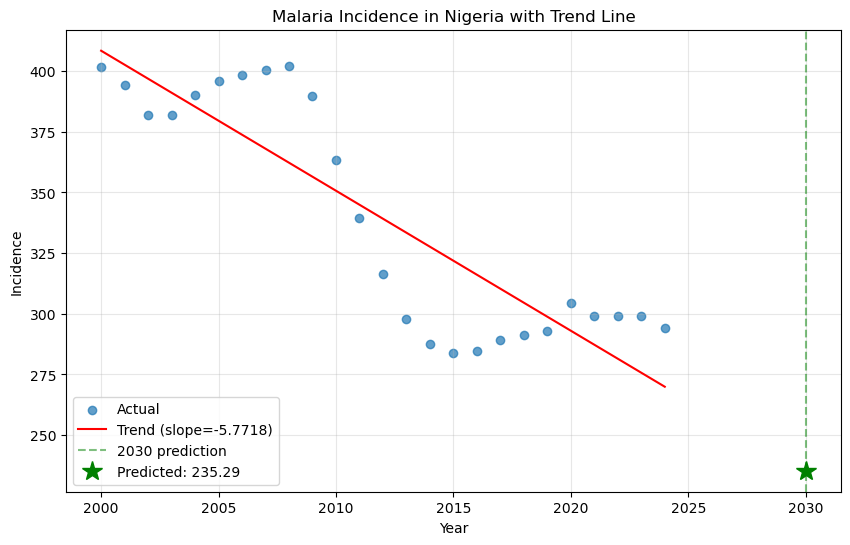

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(Nigeria['Year'], Nigeria['Incidence of malaria (per 1,000 population at risk)'], label='Actual', alpha=0.7)
plt.plot(Nigeria['Year'], Nigeria['trend'], 'r-', label=f'Trend (slope={slope1:.4f})')
plt.axvline(x=2030, color='green', linestyle='--', alpha=0.5, label='2030 prediction')
plt.plot(2030, predicted_2030, 'g*', markersize=15, label=f'Predicted: {predicted_2030:.2f}')
plt.xlabel('Year')
plt.ylabel('Incidence')
plt.title('Malaria Incidence in Nigeria with Trend Line')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [25]:
#Create a linear regression model
model = LinearRegression(fit_intercept=True)
model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [26]:
#Assign the independent variable(year) to X by drop all other varialbes
X = Nigeria.drop(['Incidence of malaria (per 1,000 population at risk)', 'trend', 'Entity', 'Code'], 
                          axis=1)



In [27]:
#Assign dependent variable to y
y = Nigeria['Incidence of malaria (per 1,000 population at risk)']
y.shape


(25,)

In [28]:
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [29]:
#find coefficient. A negative coeffecient indicates an inverse relationship between 
#the independent variable X and the dependent variable y.  
model.coef_

array([-5.77182308])

In [30]:
model.intercept_

np.float64(11952.087630769225)

In [31]:
#Predicting for years 2025 - 2030
Xfit = pd.DataFrame({'Year': [2025, 2026, 2027, 2028, 2029, 2030]})

In [32]:
yfit = model.predict(Xfit)

In [35]:
for year, prediction in zip(Xfit['Year'], yfit):
    print(f"Year {year}: {prediction:.2f}")

Year 2025: 264.15
Year 2026: 258.37
Year 2027: 252.60
Year 2028: 246.83
Year 2029: 241.06
Year 2030: 235.29


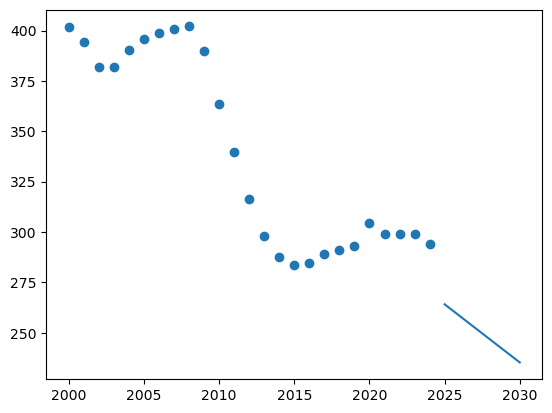

In [36]:
plt.scatter(X, y)
plt.plot(Xfit, yfit);

In [37]:
"""
Linear regression assumes a constant rate of change.
It fails to consider external factors like seasons and malaria interventions.
Model assumes a constant rate of change as it predicts 2030.
Test on 2017 - 2024 shows an error in predictions.
"""

'\nLinear regression assumes a constant rate of change.\nIt fails to consider external factors like seasons and malaria interventions.\nModel assumes a constant rate of change as it predicts 2030.\nTest on 2017 - 2024 shows an error in predictions.\n'